# Module Pandas

# Session 1:  Read and Understand the Data

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series, in addition to Categorical Data.

Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values (*.csv), Text (*.txt), JSON, HTML, Parquet, SQL database tables or queries, and Microsoft Excel. 

Pandas allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features. 

The development of pandas introduced into Python many comparable features of working with Dataframes that were established in the R programming language. 

The pandas library is built upon another library NumPy, which is oriented to efficiently working with arrays instead of the features of working on Dataframes.

To Install:
pip install pandas

In [1]:
# Import Modules:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# Different Ways to Create a Pandas DataFrame

In [2]:
# 1) Creating Pandas DataFrame from lists of lists

# initialize list of lists
data = [['tom', 10], ['nick', 15], ['julia', 14], ['harry'], [np.NaN, 22]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])
 
# print dataframe.
df

,Name,Age
0,tom,10.0
1,nick,15.0
2,julia,14.0
3,harry,NaN
4,NaN,22.0


In [3]:
# 2) Creating DataFrame from dict of lists

# initialize data.
# Note: The list containing the values must be of the same length
data = {'Name': ['Tom', 'nick', 'krish', 'jack', 'harry', np.NaN, np.NaN],
        'Age': [20, 21, 19, 18, 24, np.NaN, 21]}
 
# Create DataFrame
# No need to mention the Column Names as it is already defined by the Keys in the input Dictionary
# Index is Auto Generated as a sequence
df = pd.DataFrame(data)
 
# Print the output.
df

,Name,Age
0,Tom,20.0
1,nick,21.0
2,krish,19.0
3,jack,18.0
4,harry,24.0
5,NaN,NaN
6,NaN,21.0


In [4]:
# 3) Creating a DataFrame by proving index label explicitly

# initialize data.
data = {'Name': ['Tom', 'Jack', 'nick', 'juli'],
        'marks': [99, 98, 95, 90]}
 
# Create pandas DataFrame.
# df = pd.DataFrame(data, index=['rank1', 'rank2', 'rank3', 'rank4'])                 # If you know the number of elements
df = pd.DataFrame(data, index=['rank'+str(i+1) for i in range (len(data['Name']))])   # If the number of elements are dynamic
 
# print the data
df

,Name,marks
rank1,Tom,99
rank2,Jack,98
rank3,nick,95
rank4,juli,90


In [5]:
# 4) Creating Dataframe from list of dicts

# Initialize data.
data = [{'a': 10, 'b': 20, 'c': 30},
        {'a': 12,          'c': 33},
        {'a': 18, 'b': 22         },
        {'a': 21, 'b': 5 , 'c': 42}]

l = len(data)
 
# Creates DataFrame.
# df = pd.DataFrame(data, index = ['row1', 'row2', 'row3', 'row4'])          # If you know the number of elements
df = pd.DataFrame(data, index=['row'+str(i+1) for i in range (len(data))])   # If the number of elements are dynamic
 
# Print the data
df

,a,b,c
row1,10,20.0,30.0
row2,12,NaN,33.0
row3,18,22.0,NaN
row4,21,5.0,42.0


In [6]:
# 5) Creating DataFrame using zip() function
# zip() --> Two or more lists can be merged by using list(zip()) function. 
# Then, create the pandas DataFrame by calling pd.DataFrame() function.

# List1
Name = ['tom', 'krish', 'nick', np.NaN, 'jack', 'harry', 'stella']
 
# List2
Age = [25, 30, 'Ten', 22, 31]      # Even a single String will convert the entire column to 'Object' type

# List3
Weight = [42.3, 68.8, 22.1, 59.4, 72.7]

# List4
DoB = ['2010-05-02', '2005-11-12', '1992-05-10', '1995-03-07', '2001-05-22']
 
# get the list of tuples from four lists and merge them by using zip().
list_of_tuples = list(zip(Name, Age, Weight, DoB))
 
# Assign data to tuples.
print(list_of_tuples, end='\n\n') 
 
# Converting lists of tuples into pandas Dataframe.
df = pd.DataFrame(list_of_tuples, columns=['Name', 'Age', 'Weight', 'DoB'])
 
# Print data.
print(df.info())
df

[('tom', 25, 42.3, '2010-05-02'), ('krish', 30, 68.8, '2005-11-12'), ('nick', 'Ten', 22.1, '1992-05-10'), (nan, 22, 59.4, '1995-03-07'), ('jack', 31, 72.7, '2001-05-22')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   Age     5 non-null      object 
 2   Weight  5 non-null      float64
 3   DoB     5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes
None


,Name,Age,Weight,DoB
0,tom,25,42.3,2010-05-02
1,krish,30,68.8,2005-11-12
2,nick,Ten,22.1,1992-05-10
3,NaN,22,59.4,1995-03-07
4,jack,31,72.7,2001-05-22


In [7]:
# Assign DataTypes to each column:

df['DoB']= pd.to_datetime(df['DoB'])    # Converts from String to DateTime if all values are in the specified format of DateTime
# df['Age']= pd.to_numeric(df['Age'])   # Not allowed as 'Age' column contains a string
df = df.convert_dtypes()                # Converts the datatype of all columns from object to the actual datatype present in it
                                        # May not work for special datatypes like DateTime, TimeDelta etc. which needs to
                                        # handled individually as we did for the 'DoB' column in our example
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    4 non-null      string        
 1   Age     5 non-null      object        
 2   Weight  5 non-null      Float64       
 3   DoB     5 non-null      datetime64[ns]
dtypes: Float64(1), datetime64[ns](1), object(1), string(1)
memory usage: 293.0+ bytes
None


,Name,Age,Weight,DoB
0,tom,25,42.3,2010-05-02
1,krish,30,68.8,2005-11-12
2,nick,Ten,22.1,1992-05-10
3,<NA>,22,59.4,1995-03-07
4,jack,31,72.7,2001-05-22


# Further Reading on Pandas DataTypes:

https://pbpython.com/pandas_dtypes.html

# Pandas Series                                      

In [8]:
# Pandas Series: One-dimensional ndarray with axis labels (including time series).

# 6) Creating DataFrame from Dictionary of series. A Pandas Series

# Initialize data to Dicts of series.
d = {'one': pd.Series([10, 20, 30, 40, 50, 60],
                      index=['a', 'b', 'c', 'd', 'e', 'f']),
     'two': pd.Series([10, 20, 30, 40, 70, 80],
                      index=['a', 'b', 'c', 'g', 'h', 'i'])}
 
# creates Dataframe.
df = pd.DataFrame(d)
 
# print the data.
df

,one,two
a,10.0,10.0
b,20.0,20.0
c,30.0,30.0
d,40.0,NaN
e,50.0,NaN
f,60.0,NaN
g,NaN,40.0
h,NaN,70.0
i,NaN,80.0


In [9]:
# Creating Pandas Series:

ds = pd.Series([[10, 20*2, 40.5,  None, True,  np.nan , 4+5j, 'Text1'], 
                [30, 40*2, 50.5,  None, False, np.nan , 0o45567, 'Text2'],
                [40, 45*2, 60.5,  None, False, np.nan , 0xab5f, 'Text3'],
                [55, 65*2, 70.5,  None, True,  np.nan , 0b110111101100111, 'Text4']],
               index = ['a', 'b', 'c', 'd'])
ds

# Note that although the data looks like Two Dimensional, it is actually One Dimensional 
# where each row contains a List instead of a single value.

a    [10, 40, 40.5, None, True, nan, (4+5j), Text1]
b    [30, 80, 50.5, None, False, nan, 19319, Text2]
c    [40, 90, 60.5, None, False, nan, 43871, Text3]
d    [55, 130, 70.5, None, True, nan, 28519, Text4]
dtype: object

In [10]:
# Indexing is Allowed on Series
ds[0:2]

a    [10, 40, 40.5, None, True, nan, (4+5j), Text1]
b    [30, 80, 50.5, None, False, nan, 19319, Text2]
dtype: object

In [11]:
# Difference Between Pandas Series and Dataframe

# Pandas Series                                                  Pandas DataFrame
# One-dimensional                                                Two-dimensional
# Homogenous – Series elements must be of the same data type     Heterogenous – DataFrame elements can have different data types.
# Size-immutable – Once created, the size of a Series object     Size-mutable – Elements can be dropped or added in an existing 
# cannot be changed.                                             DataFrame.

# Import data from a File to Pandas DataFrame

In [12]:
# Import data from a csv file
# Although we can import several tabular filetypes using pandas, however we will be covering only csv files in this training
# Because csv is the most widely used file format. The steps remain same for all other file formats with the only condition 
# being that the data should be in Tabular Format

df = pd.read_csv("Pandas Sample Files/Attrition_Data.csv", sep = ',')           # To read .csv files

# df = pd.read_csv("Pandas Sample Files/Attrition_Data.txt", sep = "\t")        # To read .txt files
# df = pd.read_table("Pandas Sample Files/Attrition_Data.txt", delimiter="\t")  # To read .txt files
# df = pd.read_fwf("Pandas Sample Files/Attrition_Data.txt")                    # To read fixed width .txt files
# df = pd.read_excel("Pandas Sample Files/Attrition_Data.xlsx")                 # To read Excel files
# df = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')                  # To read HTML pages
# df = pd.read_xml('Pandas Sample Files/sample.xml')                            # To read xml pages
# df = pd.read_json('Pandas Sample Files/sample.json')                          # To read json pages
# df = pd.read_pickle('Pandas Sample Files/sample.pkl')                         # To read pickle pages

In [13]:
type(df)

pandas.core.frame.DataFrame

# Functions to Describe the DataFrame

In [14]:
# Functions / Methods in Pandas:
print([i for i in dir(df) if not i.startswith('_')])

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'T', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at', 'at_time', 'attrs', 'axes', 'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip', 'columns', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'c

In [15]:
# df.head()      -->   Returns the first 5 rows of the dataframe. Gives a brief idea about the dataset
# df.tail()      -->   Returns the last 5 rows of the dataframe
# df.shape       -->   Returns (m, n), the shape of the dataset, ie. m rowx x n columns
# df.dtypes      -->   Returns the Data Type of each column, eg. int64, float64, object etc.
# df.info()      -->   Returns useful information about the datatype eg. Data Type and Count of values present in each column
# df.describe()  -->   Returns useful statistics like mean, median, min, max, percentile, count, frequency etc.
# df.columns     -->   Returns a list with names of all columns
# df.isnull()    -->   Returns True for Missing Values
# df.notnull()   -->   Returns True for Non Missing Values
# df.sum()       -->   Returns sum of all values in numeric columns and concatenates all values in string. Irrelevant sometimes
# df.count()     -->   Returns the number of non null values for every column or for specific column (if specified)
# df.value_counts-->   Returns the count of occurance of each unique value in a given column
# df.nunique()   -->   Returns the number of unique value in a given column
# df.unique()    -->   Returns unique values present in a given column
# df.groupby()   -->   Used for grouping the data according to the categories and apply a function to the categories.


In [16]:
# head() --> Returns the first 5 rows of the dataframe, giving a brief idea about the dataset

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,NaN,1102.0,Sales,1.0,2,Life Sciences,1,1.0,...,1.0,80,0.0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,NaN,279.0,Research & Development,8.0,1,Life Sciences,1,NaN,...,4.0,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,NaN,1373.0,Research & Development,2.0,2,Other,1,NaN,...,2.0,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,NaN,1392.0,Research & Development,NaN,4,Life Sciences,1,NaN,...,3.0,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,NaN,591.0,Research & Development,NaN,1,Medical,1,5.0,...,4.0,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [17]:
# tail() --> Returns the last 5 rows of the dataframe

df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,36,No,Travel_Frequently,884.0,Research & Development,23.0,2,Medical,1,2936.0,...,3.0,80,1.0,17.0,3.0,3,5.0,2.0,0.0,3.0
2936,39,No,Travel_Rarely,613.0,Research & Development,6.0,1,Medical,1,2937.0,...,1.0,80,1.0,9.0,5.0,3,7.0,7.0,1.0,7.0
2937,27,No,Travel_Rarely,155.0,Research & Development,4.0,3,Life Sciences,1,2938.0,...,2.0,80,1.0,6.0,0.0,3,6.0,2.0,0.0,3.0
2938,49,No,Travel_Frequently,1023.0,Sales,2.0,3,Medical,1,2939.0,...,4.0,80,0.0,17.0,3.0,2,9.0,6.0,0.0,8.0
2939,34,No,Travel_Rarely,628.0,Research & Development,8.0,3,Medical,1,2940.0,...,1.0,80,0.0,6.0,3.0,4,4.0,3.0,1.0,2.0


In [18]:
# shape --> Returns (m, n), the shape of the dataset, ie. m rowx x n columns
df.shape
# Insights: The dataset has 2940 rows and 35 columns

(2940, 35)

In [19]:
# dtypes --> Returns the Data Type of each column, eg. int64, float64, object etc.
df.dtypes
# Returns the datatype of each column

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber              float64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                    float64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours                 int64
StockOptionLevel            

In [20]:
# info() --> Returns useful information about the dataframe like DataType and Count of Non-Null values present in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2940 non-null   int64  
 1   Attrition                 2938 non-null   object 
 2   BusinessTravel            2934 non-null   object 
 3   DailyRate                 2937 non-null   float64
 4   Department                2926 non-null   object 
 5   DistanceFromHome          2925 non-null   float64
 6   Education                 2940 non-null   int64  
 7   EducationField            2917 non-null   object 
 8   EmployeeCount             2940 non-null   int64  
 9   EmployeeNumber            2937 non-null   float64
 10  EnvironmentSatisfaction   2940 non-null   int64  
 11  Gender                    2913 non-null   object 
 12  HourlyRate                2910 non-null   float64
 13  JobInvolvement            2940 non-null   int64  
 14  JobLevel

In [21]:
# describe() --> Returns useful statistics like mean, median, min, max, percentile, count, frequency etc. for numeric columns

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2937.000000,2925.000000,2940.000000,2940.0,2937.000000,2940.000000,2910.000000,2940.000000,2937.000000,...,2930.000000,2940.0,2927.000000,2923.000000,2917.000000,2940.000000,2924.000000,2924.000000,2922.000000,2912.000000
mean,36.923810,802.535581,9.198632,2.912925,1.0,1471.998979,2.721769,65.862543,2.729932,2.064351,...,2.712969,80.0,0.793987,11.275744,2.799109,2.761224,7.010260,4.232216,2.186858,4.131525
std,9.133819,403.364410,8.100041,1.023991,0.0,847.984966,1.092896,20.336048,0.711440,1.107141,...,1.081141,0.0,0.851354,7.775463,1.286774,0.706356,6.131741,3.621094,3.224031,3.571358
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,738.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1472.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2206.000000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
# include = 'all' --> Returns statistics for both Numerical and Categorical columns
# percentiles = [....] --> You can specify which percentiles you want
desc = df.describe(include = 'all', percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
print(type(desc))     # Returns a DataFrame
desc

<class 'pandas.core.frame.DataFrame'>


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2938,2934,2937.000000,2926,2925.000000,2940.000000,2917,2940.0,2937.000000,...,2930.000000,2940.0,2927.000000,2923.000000,2917.000000,2940.000000,2924.000000,2924.000000,2922.000000,2912.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2464,2083,NaN,1912,NaN,NaN,1203,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.535581,NaN,9.198632,2.912925,NaN,1.0,1471.998979,...,2.712969,80.0,0.793987,11.275744,2.799109,2.761224,7.010260,4.232216,2.186858,4.131525
std,9.133819,NaN,NaN,403.364410,NaN,8.100041,1.023991,NaN,0.0,847.984966,...,1.081141,0.0,0.851354,7.775463,1.286774,0.706356,6.131741,3.621094,3.224031,3.571358
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,NaN,NaN,243.000000,NaN,1.000000,1.000000,NaN,1.0,297.600000,...,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
20%,29.000000,NaN,NaN,392.000000,NaN,2.000000,2.000000,NaN,1.0,591.200000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000
30%,31.000000,NaN,NaN,530.800000,NaN,3.000000,2.000000,NaN,1.0,884.800000,...,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000


In [23]:
# columns --> Returns a list with names of all columns
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
for column in columns:
    print(column)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [25]:
# isnull() --> Returns True for Missing Values
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# notnull() --> Returns True for Non Missing Values
df.notnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,False,True,True,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,True,True,False,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2937,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2938,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [27]:
# sum() --> Returns sum of all values in numeric columns. Irrelevant sometimes as computing the sum of each column may not
#           be of any use

df.sum()

Age                           108556.0
DailyRate                    2357047.0
DistanceFromHome               26906.0
Education                       8564.0
EmployeeCount                   2940.0
EmployeeNumber               4323261.0
EnvironmentSatisfaction         8002.0
HourlyRate                    191660.0
JobInvolvement                  8026.0
JobLevel                        6063.0
JobSatisfaction                 8022.0
MonthlyIncome               19050323.0
MonthlyRate                 42080524.0
NumCompaniesWorked              7918.0
PercentSalaryHike              44576.0
PerformanceRating               9234.0
RelationshipSatisfaction        7949.0
StandardHours                 235200.0
StockOptionLevel                2324.0
TotalWorkingYears              32959.0
TrainingTimesLastYear           8165.0
WorkLifeBalance                 8118.0
YearsAtCompany                 20498.0
YearsInCurrentRole             12375.0
YearsSinceLastPromotion         6390.0
YearsWithCurrManager     

In [28]:
# Sum of all values in 'HourlyRate' column:
df['HourlyRate'].sum()

191660.0

In [29]:
# count() --> Returns the number of non null values for every column
df.count()

Age                         2940
Attrition                   2938
BusinessTravel              2934
DailyRate                   2937
Department                  2926
DistanceFromHome            2925
Education                   2940
EducationField              2917
EmployeeCount               2940
EmployeeNumber              2937
EnvironmentSatisfaction     2940
Gender                      2913
HourlyRate                  2910
JobInvolvement              2940
JobLevel                    2937
JobRole                     2912
JobSatisfaction             2940
MaritalStatus               2935
MonthlyIncome               2933
MonthlyRate                 2940
NumCompaniesWorked          2940
Over18                      2937
OverTime                    2922
PercentSalaryHike           2930
PerformanceRating           2928
RelationshipSatisfaction    2930
StandardHours               2940
StockOptionLevel            2927
TotalWorkingYears           2923
TrainingTimesLastYear       2917
WorkLifeBa

In [30]:
# Returns the number of rows with non null values for a specific column
df['HourlyRate'].count()

2910

In [31]:
# Combining isnull() and sum() returns the number of NaN values for each column
df.isnull().sum()

Age                          0
Attrition                    2
BusinessTravel               6
DailyRate                    3
Department                  14
DistanceFromHome            15
Education                    0
EducationField              23
EmployeeCount                0
EmployeeNumber               3
EnvironmentSatisfaction      0
Gender                      27
HourlyRate                  30
JobInvolvement               0
JobLevel                     3
JobRole                     28
JobSatisfaction              0
MaritalStatus                5
MonthlyIncome                7
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       3
OverTime                    18
PercentSalaryHike           10
PerformanceRating           12
RelationshipSatisfaction    10
StandardHours                0
StockOptionLevel            13
TotalWorkingYears           17
TrainingTimesLastYear       23
WorkLifeBalance              0
YearsAtCompany              16
YearsInC

In [32]:
# value_counts() --> Returns the count of occurance of each unique value in a given column
df["Gender"].value_counts()

Male      1752
Female    1161
Name: Gender, dtype: int64

In [33]:
# nunique() --> Returns the number of unique value in a given column
df["Gender"].nunique()

2

In [34]:
# unique() --> Returns unique values present in a given column
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [35]:
# df.groupby() --> Used for grouping the data according to 1 or more categories and apply a function to the categories.
res = df.groupby(['Gender', 'Attrition','Department']).count()
res

Age  BusinessTravel  DailyRate  \
Gender Attrition Department                                               
Female No        Human Resources          28              28         28   
                 Research & Development  661             661        661   
                 Sales                   297             297        297   
       Yes       Human Resources          12              12         12   
                 Research & Development   85              85         85   
                 Sales                    74              73         74   
Male   No        Human Resources          73              73         73   
                 Research & Development  967             965        967   
                 Sales                   402             402        402   
       Yes       Human Resources          12              12         12   
                 Research & Development  178             178        178   
                 Sales                   108             108        108   

                                         DistanceFromHome  Education  \
Gender Attrition Department                                            
Female No        Human Resources                       28         28   
                 Research & Development               660        661   
                 Sales                                295        297   
       Yes       Human Resources                       12         12   
                 Research & Development                83         85   
                 Sales                                 74         74   
Male   No        Human Resources                       72         73   
                 Research & Development               964        967   
                 Sales                                399        402   
       Yes       Human Resources                       12         12   
                 Research & Development               178        178   
                 Sales                                107        108   

                                         EducationField  EmployeeCount  \
Gender Attrition Department                                              
Female No        Human Resources                     28             28   
                 Research & Development             660            661   
                 Sales                              295            297   
       Yes       Human Resources                     12             12   
                 Research & Development              84             85   
                 Sales                               74             74   
Male   No        Human Resources                     72             73   
                 Research & Development             963            967   
                 Sales                              402            402   
       Yes       Human Resources                     12             12   
                 Research & Development             178            178   
                 Sales                              107            108   

                                         EmployeeNumber  \
Gender Attrition Department                               
Female No        Human Resources                     28   
                 Research & Development             661   
                 Sales                              297   
       Yes       Human Resources                     12   
                 Research & Development              85   
                 Sales                               74   
Male   No        Human Resources                     73   
                 Research & Development             966   
                 Sales                              402   
       Yes       Human Resources                     12   
                 Research & Development             178   
                 Sales                              108   

                                         EnvironmentSatisfaction  HourlyRate  \
Gender Attrition Department          

In [36]:
# df.pivot(index, columns, values) --> produces pivot table based on 3 columns of the DataFrame. Uses unique values 
#                                      from index / columns and fills with values.

df.pivot_table('MonthlyIncome', ['Gender', 'Department', 'JobLevel'], 'Attrition', fill_value=0)

Attrition                                         No           Yes
Gender Department             JobLevel                            
Female Human Resources        1.0        2771.200000   2534.800000
                              2.0        5859.333333      0.000000
                              3.0        9296.500000   9950.000000
                              4.0       17063.500000      0.000000
                              5.0       19251.000000      0.000000
       Research & Development 1.0        2899.979079   2702.269841
                              2.0        5228.563636   5595.500000
                              3.0       10345.422018   8911.000000
                              4.0       15381.442623      0.000000
                              5.0       19140.533333  19545.000000
       Sales                  1.0        2564.789474   2495.258065
                              2.0        5617.070175   5819.428571
                              3.0        9692.666667   7706.666667
                              4.0       15404.187500  13194.000000
                              5.0       18823.500000  19334.500000
Male   Human Resources        1.0        2920.657143   2296.600000
                              2.0        5474.700000      0.000000
                              3.0        9356.500000  10482.000000
                              4.0       15231.500000      0.000000
                              5.0       19176.600000      0.000000
       Research & Development 1.0        2881.871046   2682.897059
                              2.0        5318.350993   5290.727273
                              3.0       10091.254237   9870.692308
                              4.0       15934.555556  12169.000000
                              5.0       19227.098361  19552.500000
       Sales                  1.0        2633.200000   2287.125000
                              2.0        5807.030702   5976.391304
                              3.0        9080.108434   9828.333333
                              4.0       15364.307692  13463.000000
                              5.0       19168.714286      0.000000

# Plot Basic Graphs using Pandas

In [37]:
# Pandas can directly plot a variety of graphs like Histogram, Scatter Plot, Bar Graphs, Line Graphs, pie charts, 
# boxplot, heatmap etc..
# For advanced and professional quality graphs and more customization options, use matplorlib or seaborn modules (covered later)

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

kind: 'str' -----
The kind of plot to produce:

‘line’ : line plot (default)

‘bar’ : vertical bar plot

‘barh’ : horizontal bar plot

‘hist’ : histogram

‘box’ : boxplot

‘kde’ : Kernel Density Estimation plot

‘density’ : same as ‘kde’

‘area’ : area plot

‘pie’ : pie plot

‘scatter’ : scatter plot (DataFrame only)

‘hexbin’ : hexbin plot (DataFrame only)

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

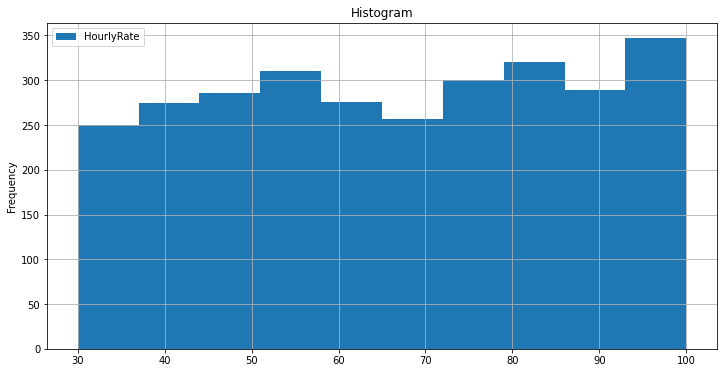

In [38]:
# hist() --> Plots a Histogram for the selected column
df["HourlyRate"].plot(kind='hist', figsize=(12,6), bins=10, title = "Histogram", 
                      grid=True, legend=True)

<AxesSubplot:title={'center':'KDE Plot'}, ylabel='Density'>

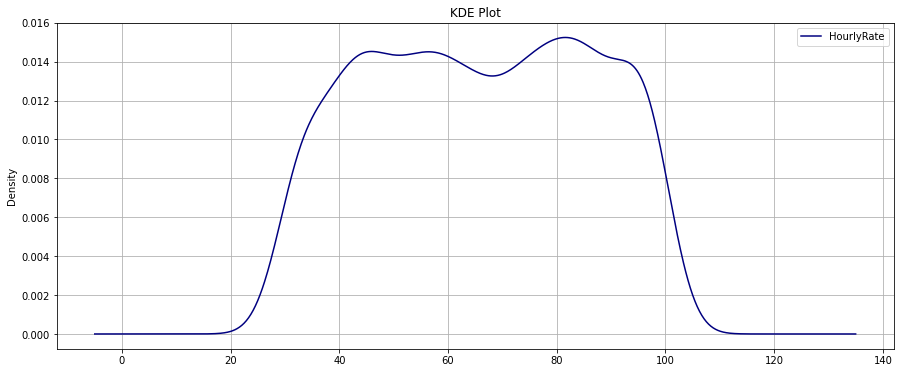

In [39]:
df["HourlyRate"].plot(kind='kde', figsize=(15,6), title = "KDE Plot", 
                      grid=True, legend=True, colormap='jet')

<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

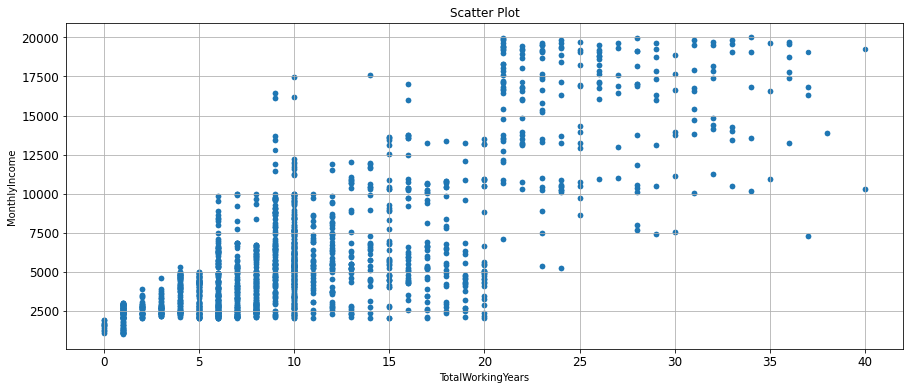

In [40]:
# plot(kind = 'scatter') --> Plots a scatter plot for the selected column
df.plot(kind = 'scatter', x = 'TotalWorkingYears', y = 'MonthlyIncome', 
        figsize=(15,6), title = "Scatter Plot", grid=True, fontsize=12)

<AxesSubplot:title={'center':'Bar Graph'}>

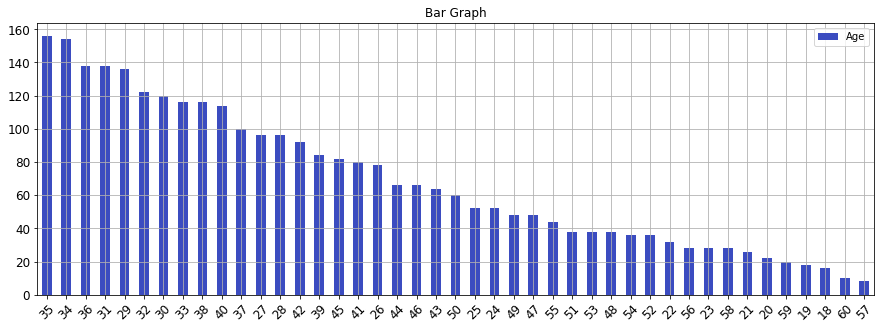

In [41]:
# plot(kind = 'bar') --> Plots a line graph for the selected column
df["Age"].value_counts().plot(kind = 'bar', figsize=(15,5), title = "Bar Graph", 
                              grid=True, legend=True, rot=45, fontsize=12, colormap='coolwarm')
# Replace kind = 'bar' with kind = 'barh' for horizontal bars

<AxesSubplot:title={'center':'Pie Graph'}, ylabel='Department'>

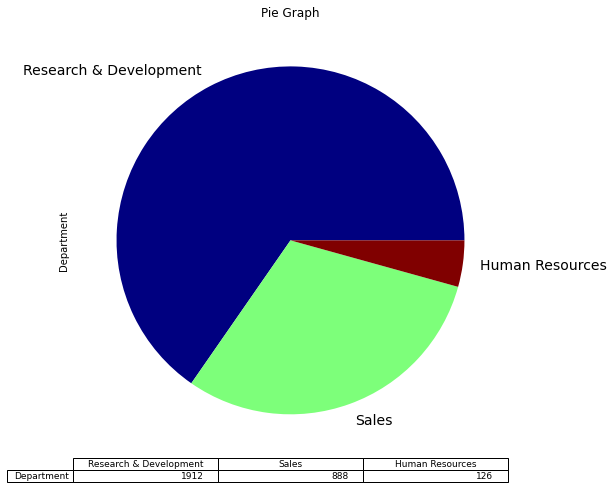

In [42]:
# plot(kind = 'pie') --> Plots a pie graph for the selected column
df["Department"].value_counts().plot(kind = 'pie', figsize=(15,8), title = "Pie Graph", 
                                     colormap='jet', fontsize=14, table=True)

<AxesSubplot:title={'center':'Box Plot'}>

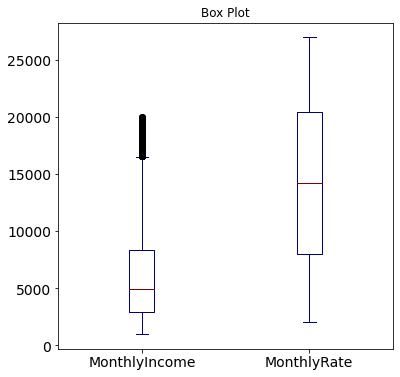

In [43]:
# plot(kind = 'box') --> Plots a boxplot for the selected column
df[["MonthlyIncome", "MonthlyRate"]].plot(kind = 'box', figsize=(6,6), title = "Box Plot", 
                                     colormap='jet', fontsize=14)

In [44]:
# Heatmap to plot Correlation Coefficient

df[['DailyRate', 
    'DistanceFromHome', 
    'HourlyRate', 
    'MonthlyIncome', 
    'MonthlyRate',
    'PercentSalaryHike',
    'YearsInCurrentRole',
    'YearsAtCompany']].corr().style.background_gradient(cmap ='viridis')

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany
DailyRate,1.000000,-0.007394,0.022581,0.008495,-0.032466,0.021781,0.008705,-0.034502
DistanceFromHome,-0.007394,1.000000,0.029389,-0.018294,0.026819,0.039957,0.018963,0.011469
HourlyRate,0.022581,0.029389,1.000000,-0.016571,-0.014483,-0.010162,-0.028170,-0.018609
MonthlyIncome,0.008495,-0.018294,-0.016571,1.000000,0.033825,-0.026489,0.366595,0.514500
MonthlyRate,-0.032466,0.026819,-0.014483,0.033825,1.000000,-0.006455,-0.010628,-0.023102
PercentSalaryHike,0.021781,0.039957,-0.010162,-0.026489,-0.006455,1.000000,-0.000847,-0.037459
YearsInCurrentRole,0.008705,0.018963,-0.028170,0.366595,-0.010628,-0.000847,1.000000,0.757742
YearsAtCompany,-0.034502,0.011469,-0.018609,0.514500,-0.023102,-0.037459,0.757742,1.000000


In [45]:
# Plotting and Visualizations will be covered in more detail in matplotlib and seaborn sessions

# Some more frequently used methods, similar to Numpy

In [46]:
# min(), max(), mean(), median(), std(), sum(), product(), var(), cumsum(), mode(), corr()

print(df['HourlyRate'].min())                # Minimum
print(df['HourlyRate'].max())                # Maximum
print(df['HourlyRate'].mean())               # Mean / Average
print(df['HourlyRate'].median())             # Median
print(df['HourlyRate'].std())                # Standard Deviation
print(df['HourlyRate'].sum())                # Sum
print(df['YearsWithCurrManager'].product())  # Product
print(df['HourlyRate'].var())                # Variance
print(df['HourlyRate'].cumsum())            # Cumulative Sum
print(df["Gender"].mode())                   # Mode

30.0
100.0
65.86254295532646
66.0
20.336047692336248
191660.0
0.0
413.5548357449744
0           94.0
1          155.0
2          247.0
3          303.0
4          343.0
          ...   
2935    191386.0
2936    191428.0
2937    191515.0
2938    191578.0
2939    191660.0
Name: HourlyRate, Length: 2940, dtype: float64
0    Male
Name: Gender, dtype: object


In [47]:
df.corr()       # Correlation Coefficient

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010238,-0.001871,0.208034,NaN,-0.004652,0.010146,0.024875,0.029820,0.509667,...,0.053945,NaN,0.036439,0.681587,-0.018043,-0.021490,0.311282,0.215297,0.216118,0.202572
DailyRate,0.010238,1.000000,-0.007394,-0.017345,NaN,-0.025144,0.018923,0.022581,0.045470,0.002967,...,0.008218,NaN,0.039845,0.015743,0.004247,-0.037248,-0.034502,0.008705,-0.035075,-0.026251
DistanceFromHome,-0.001871,-0.007394,1.000000,0.019462,NaN,0.014359,-0.015772,0.029389,0.008593,0.004208,...,0.009809,NaN,0.041427,0.005116,-0.036616,-0.027450,0.011469,0.018963,0.008836,0.014727
Education,0.208034,-0.017345,0.019462,1.000000,NaN,0.019998,-0.027128,0.015130,0.042438,0.101631,...,-0.007371,NaN,0.019397,0.148794,-0.021966,0.009819,0.069398,0.058650,0.054359,0.069027
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.004652,-0.025144,0.014359,0.019998,NaN,1.000000,0.010259,0.016842,-0.004546,-0.010857,...,-0.034533,NaN,0.030735,-0.008115,0.012317,0.005977,-0.005899,-0.003026,-0.005276,-0.004272
EnvironmentSatisfaction,0.010146,0.018923,-0.015772,-0.027128,NaN,0.010259,1.000000,-0.049932,-0.008278,0.000725,...,0.006416,NaN,0.002469,-0.003683,-0.019166,0.027627,0.000321,0.016711,0.016372,-0.005091
HourlyRate,0.024875,0.022581,0.029389,0.015130,NaN,0.016842,-0.049932,1.000000,0.044103,-0.027248,...,0.000726,NaN,0.051093,-0.001979,-0.009544,-0.004444,-0.018609,-0.028170,-0.027485,-0.018066
JobInvolvement,0.029820,0.045470,0.008593,0.042438,NaN,-0.004546,-0.008278,0.044103,1.000000,-0.012069,...,0.035948,NaN,0.023961,-0.006552,-0.015154,-0.014617,-0.020282,0.006283,-0.025790,0.025580
JobLevel,0.509667,0.002967,0.004208,0.101631,NaN,-0.010857,0.000725,-0.027248,-0.012069,1.000000,...,0.024241,NaN,0.013699,0.781732,-0.013791,0.037929,0.536584,0.392753,0.354758,0.378621


# Extract a single Column as a Series or a group of Columns as a DataFrame

In [48]:
# Extract a single column by Column Name. It will return a Pandas Series
print(type(df['Department']), '\n')  
print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

# Method 1
print(df['Department'], '\n')
print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

# Method 2 (works only for single column)
print(df.Department)

<class 'pandas.core.series.Series'> 


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
2935    Research & Development
2936    Research & Development
2937    Research & Development
2938                     Sales
2939    Research & Development
Name: Department, Length: 2940, dtype: object 


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
2935    Research & Development
2936    Research & Development
2937    Research & Development
2938                     Sales
2939    Research & Development
Name: Department, Length: 2940, dtype: object


In [49]:
# Extract multiple columns by Column Names. It will return a Pandas Data Frame

sub_df = df[['Department', 'Gender']]
print(type(sub_df), '\n')  
sub_df.head()

<class 'pandas.core.frame.DataFrame'> 



,Department,Gender
0,Sales,Female
1,Research & Development,Male
2,Research & Development,NaN
3,Research & Development,NaN
4,Research & Development,NaN


# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Session 2:  Data Wrangling & Data Manipulation

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Handling Missing Values

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,NaN,1102.0,Sales,1.0,2,Life Sciences,1,1.0,...,1.0,80,0.0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,NaN,279.0,Research & Development,8.0,1,Life Sciences,1,NaN,...,4.0,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,NaN,1373.0,Research & Development,2.0,2,Other,1,NaN,...,2.0,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,NaN,1392.0,Research & Development,NaN,4,Life Sciences,1,NaN,...,3.0,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,NaN,591.0,Research & Development,NaN,1,Medical,1,5.0,...,4.0,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [51]:
# Question: Find out the number and percentage of missing values for each column in the DataFrame

total = df.isnull().sum()     # Gives the sum of Null Values for each column
total

Age                          0
Attrition                    2
BusinessTravel               6
DailyRate                    3
Department                  14
DistanceFromHome            15
Education                    0
EducationField              23
EmployeeCount                0
EmployeeNumber               3
EnvironmentSatisfaction      0
Gender                      27
HourlyRate                  30
JobInvolvement               0
JobLevel                     3
JobRole                     28
JobSatisfaction              0
MaritalStatus                5
MonthlyIncome                7
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       3
OverTime                    18
PercentSalaryHike           10
PerformanceRating           12
RelationshipSatisfaction    10
StandardHours                0
StockOptionLevel            13
TotalWorkingYears           17
TrainingTimesLastYear       23
WorkLifeBalance              0
YearsAtCompany              16
YearsInC

In [52]:
len(df)        # Gives the total number of rows in the dataframe

2940

In [53]:
percent = round((df.isnull().sum()/len(df))*100, 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Age,0,0.00
Attrition,2,0.07
BusinessTravel,6,0.20
DailyRate,3,0.10
Department,14,0.48
DistanceFromHome,15,0.51
Education,0,0.00
EducationField,23,0.78
EmployeeCount,0,0.00
EmployeeNumber,3,0.10


In [54]:
# Replace Missing Values in 'Gender' column with NaN (Not a Number), a datatype recognised by Numpy and Pandas
df['Gender'] = df['Gender'].replace('', np.nan)

In [55]:
# Replace Missing Values in all columns with NaN (Not a Number), a datatype recognised by Numpy and Pandas
df = df.replace('', np.nan)

In [56]:
df.head()    # Now we have all missing values as a Numpy Not A Number format

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,NaN,1102.0,Sales,1.0,2,Life Sciences,1,1.0,...,1.0,80,0.0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,NaN,279.0,Research & Development,8.0,1,Life Sciences,1,NaN,...,4.0,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,NaN,1373.0,Research & Development,2.0,2,Other,1,NaN,...,2.0,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,NaN,1392.0,Research & Development,NaN,4,Life Sciences,1,NaN,...,3.0,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,NaN,591.0,Research & Development,NaN,1,Medical,1,5.0,...,4.0,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [57]:
import copy

df1 = df.copy(deep = True)      # Create a fresh copy of the original DataFrame to avoid manipulating the original DataFrame
df2 = df.copy(deep = True)      # Create a fresh copy of the original DataFrame to avoid manipulating the original DataFrame

# Method 1: Drop all rows with NaN Values

In [58]:
# This method can be used only when the number of rows with at least 1 NaN value is <= 25% of the total number of rows
# in the DataFrame.

In [59]:
# Shape of the DataFrame before dropping NaN Value Rows:
df1.shape       

(2940, 35)

In [60]:
df1 = df1.dropna()
df1.shape       # Shape of the DataFrame after dropping all NaN Value Rows. Note that [2940 - 2750] = 190 rows have been dropped

(2740, 35)

# Method 2: Imputation: Replace all NaN Values with the Mean / Median / Mode

In [61]:
# Replace all NaN Values with the Mean / Median (For Numeric Columns) and Mode (for Categorical Columns)
# to avoid losing the entire row of data just for a single missing value

In [62]:
# Shape of the DataFrame before replacing NaN Value Rows:
df2.shape

(2940, 35)

In [63]:
# Replace all missing numerical values in the entire DataFrame with the median value of the respective column
df2 = df2.fillna(df2.median())
df2.shape

(2940, 35)

In [64]:
# Replace all missing Categorical values in the entire DataFrame with the mode value of the respective column.
# df.mode() returns a series and not a DataFrame, Hence we need to find out the mode of each categorical column individually

# Create a list of all categorical columns or object columns
cat = [i for i in df2.columns if df2.dtypes[i] == 'object']

for column in cat:
    df2[column].fillna(df2[column].mode()[0], inplace=True)  
    
# mode() returns multiple rows if there is more than 1 mode for a column. 
# Hence we use indexing 'mode()[0]' to obtain only the first value

df2.shape

(2940, 35)

In [65]:
total = df2.isnull().sum()
percent = round((df2.isnull().sum()/len(df2))*100, 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# So we have a DataFrame with no missing or NaN Values.
# These are 2 different ways in which we can handle NaN or Missing Values

,Total,Percent
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [66]:
# Save the cleaned up DataFrame as a new csv file:
df2.to_csv("Pandas Sample Files/sample.csv", index = None)

# Saving a DataFrame as different File Formats

In [67]:
# Save a DataFrame as a csv, html, excel, json, xml, text files

df2.to_csv   ("Pandas Sample Files/sample.csv" , index = None)
df2.to_html  ("Pandas Sample Files/sample.html", index = None)
df2.to_excel ("Pandas Sample Files/sample.xlsx", index = None)
df2.to_json  ("Pandas Sample Files/sample.json", orient = 'table', index = None)
df2.to_xml   ("Pandas Sample Files/sample.xml" , index = None)
df2.to_string("Pandas Sample Files/sample.txt" , index = None)
df2.to_hdf   ("Pandas Sample Files/sample.h5"  , key='df')
df2.to_pickle("Pandas Sample Files/sample.pkl")

# Outlier Treatment

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

Outliers are not always undesirable, for example in case of Anomaly Detection Problems like Financial Frauds, Disease Detection, Fault Test Analysis etc., outliers play an important role as the key intention of such analysis is to detect outliers and hence in such scenarios, we must not manipulate them.

However in scenarios like Product Cost, Weather Predictions, Quality Predictions etc., Outliers may potentially impact the results of the analysis and must be treated accordingly.

The two common approaches to exclude outliers are truncation (or trimming) and Winsorising. Trimming discards the outliers whereas Winsorising replaces the outliers with the nearest "non-suspect" data like Mean / Median / etc..

Let's try to understand both the methods of Outlier Treatments, ie. Truncation and Winsorising

# Identify Columns with Outliers

In [68]:
# There are several ways to identify Outliers:
#    1) Significant difference between Mean and Median of a particular column
#    2) Z-Score >= 3 for individual values in each column
#    3) All values above (say) 90th percentile and all values below (say) 10th percentile values of each column
#    4) Box Plot for each column

In [69]:
#  Create a subset of the original dataframe for simplicity. Let's say we need to find the outliers only for the below columns:

df3 = df1[['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears']]
df3.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears
23,391.0,15.0,96.0,1232.0,19281,0.0
24,699.0,6.0,83.0,2960.0,17102,8.0
25,1282.0,5.0,58.0,19094.0,10735,26.0
26,1125.0,16.0,72.0,3919.0,4681,10.0
27,691.0,8.0,48.0,6825.0,21173,10.0


# Understanding Box Plot

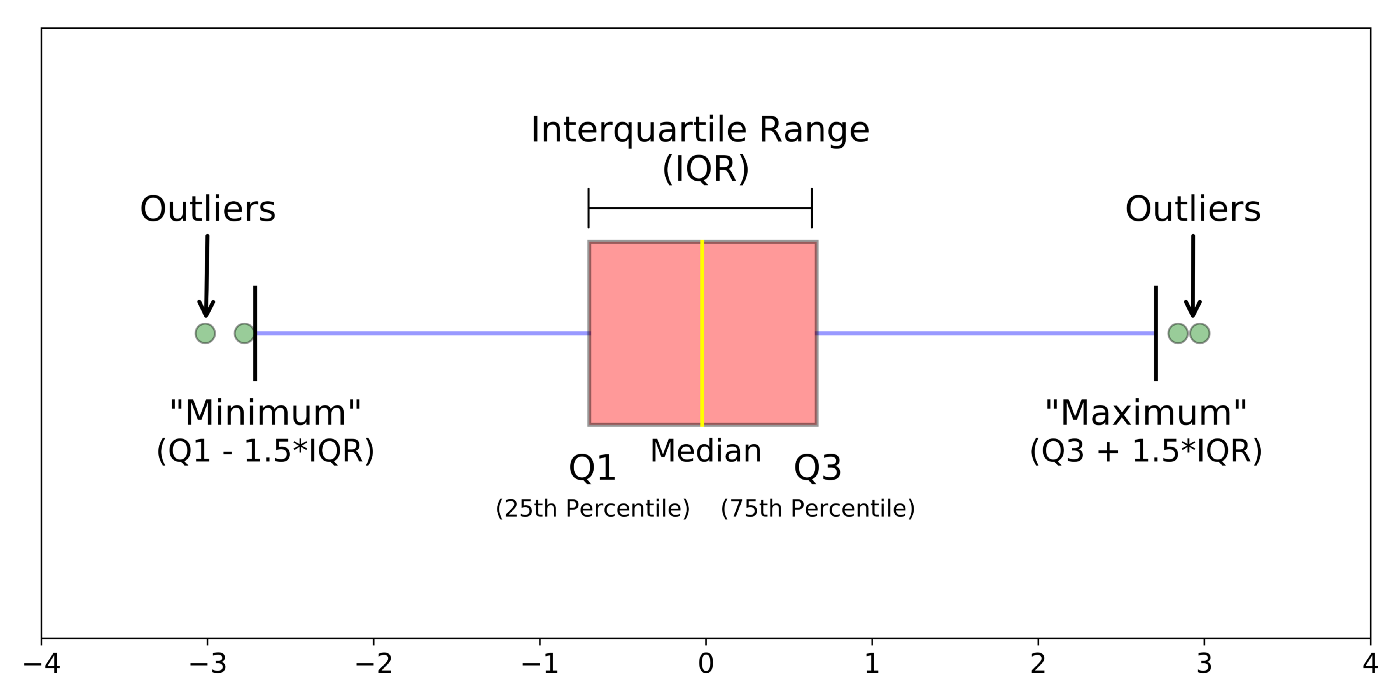

In [70]:
# Create copies of the original DataFrame to keep the original DataFrame intact:
df4 = df3.copy(deep = True)
df5 = df3.copy(deep = True)
df6 = df3.copy(deep = True)

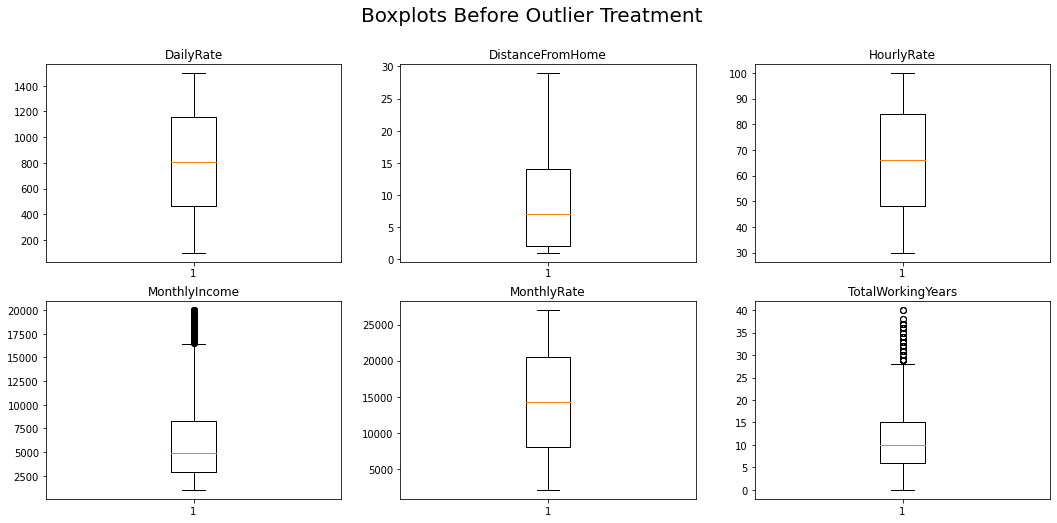

In [71]:
# Plot BoxPlots to detect and visualize outliers

cols = list(df3.columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        ax[i, j].boxplot(df3[[cols[c]]])
        ax[i, j].set_title(cols[c])
        c=c+1 
fig.suptitle("Boxplots Before Outlier Treatment", fontsize=20)
plt.show()

# Based on the boxplots, we can clearly see that there are outliers in "MonthlyIncome" and "TotalWorkingYears" columns
# that we need to treat

# Truncation

In [72]:
# The objective is to remove the entire row where at least 1 of the values is an outlier

In [73]:
# Method 1: Remove all rows with at least 1 value above 90th Percentile or below 10th Percentile value of the respective column

for col in df4.columns:
    q1 = df4[col].quantile(0.1)
    q2 = df4[col].quantile(0.9)

    df4 = df4[df4[col].between(q1, q2)]    

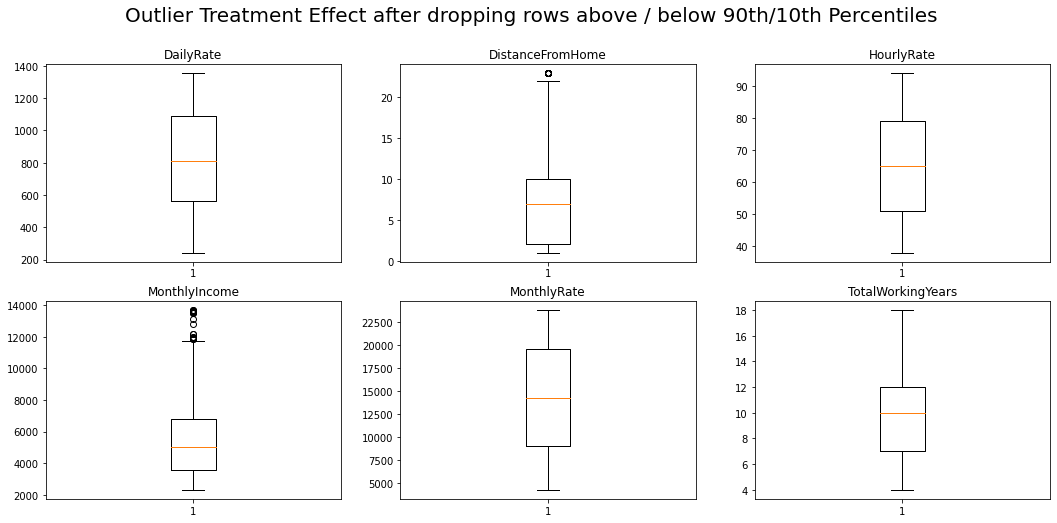

In [74]:
# Plot box plots again to verify the application of Outlier Treatment by Method 1

cols = list(df4.columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        ax[i, j].boxplot(df4[[cols[c]]])
        ax[i, j].set_title(cols[c])
        c=c+1 
fig.suptitle("Outlier Treatment Effect after dropping rows above / below 90th/10th Percentiles", fontsize=20)
plt.show()

In [75]:
# Method 2: Keep only those rows where the Z Score of all columns is < 3. 
# Basically drop all rows where Z Score value of at least 1 column >= 3

from scipy import stats
df5 = df5[(np.abs(stats.zscore(df5)) < 3).all(axis=1)]

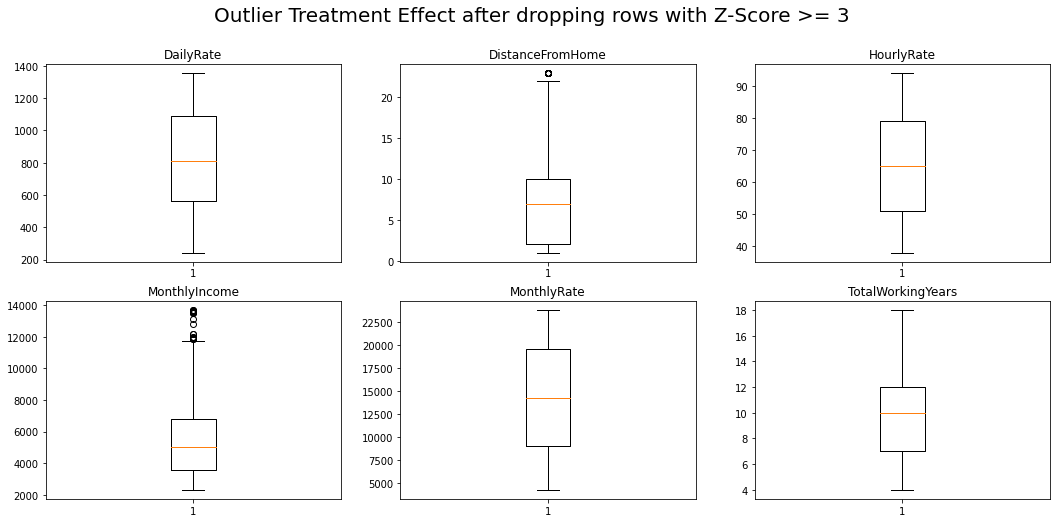

In [76]:
# Plot box plots again to verify the application of Outlier Treatment by Method 2

cols = list(df4.columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        ax[i, j].boxplot(df4[[cols[c]]])
        ax[i, j].set_title(cols[c])
        c=c+1 
fig.suptitle("Outlier Treatment Effect after dropping rows with Z-Score >= 3", fontsize=20)
plt.show()

# Winsorising

In [77]:
# Method 1: 
# Replace all values below 10th Percentile with 10th percentile value
# Replace all values above 90th Percentile with 90th percentile value

for col in df6.columns:
    df6[col].loc[df6[col] < df6[col].quantile(0.10)] = df6[col].quantile(0.10)
    df6[col].loc[df6[col] > df6[col].quantile(0.90)] = df6[col].quantile(0.90)

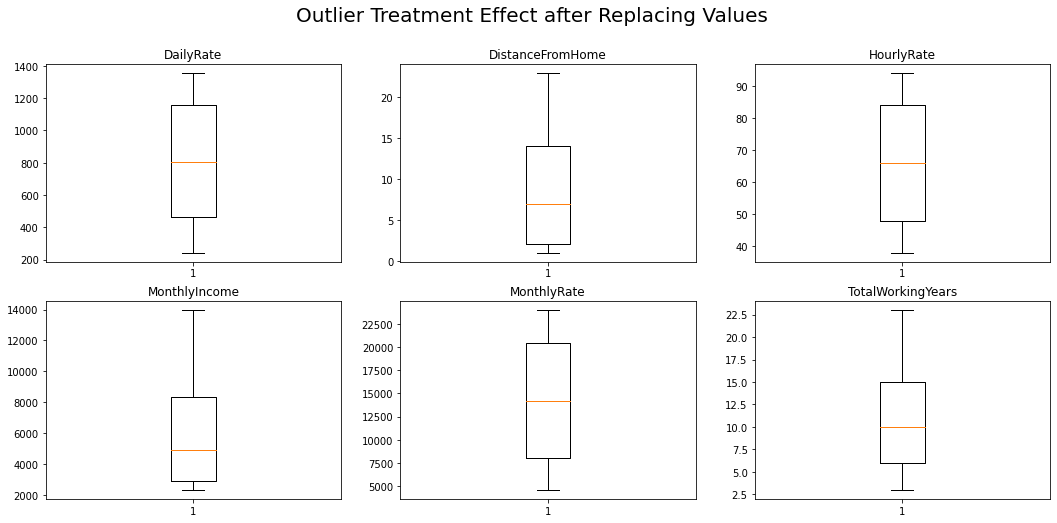

In [78]:
# Plot box plots again to verify the application of Outlier Treatment

cols = list(df6.columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        ax[i, j].boxplot(df6[[cols[c]]])
        ax[i, j].set_title(cols[c])
        c=c+1 
fig.suptitle("Outlier Treatment Effect after Replacing Values", fontsize=20)
plt.show()

# Some More Useful Functions

In [79]:
# Create copies of the original DataFrame to keep the original DataFrame intact:
df7 = df3.copy(deep = True)
df7.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears
23,391.0,15.0,96.0,1232.0,19281,0.0
24,699.0,6.0,83.0,2960.0,17102,8.0
25,1282.0,5.0,58.0,19094.0,10735,26.0
26,1125.0,16.0,72.0,3919.0,4681,10.0
27,691.0,8.0,48.0,6825.0,21173,10.0


In [80]:
# df.drop()  --> Removes the specified row or column.

# By specifying the column axis (axis=1), the drop() method removes the specified column.
# By specifying the row axis (axis=0), the drop() method removes the specified row.

df7.drop("DailyRate", axis=1, inplace = True) # inplace=True --> This updates the dataframe without using assignment operator
df7.head()

,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears
23,15.0,96.0,1232.0,19281,0.0
24,6.0,83.0,2960.0,17102,8.0
25,5.0,58.0,19094.0,10735,26.0
26,16.0,72.0,3919.0,4681,10.0
27,8.0,48.0,6825.0,21173,10.0


In [104]:
# df.pop()  --> Removes the specified column from the DataFrame and returns the removed columns as a Pandas Series object.
df7.pop('HourlyRate')
df7.head()

KeyError: 'HourlyRate'

In [82]:
# df.rename() --> Re-Names a Column:

df7 = df7.rename(columns = {'DistanceFromHome' : 'Distance',
                            'MonthlyIncome' : 'Salary',
                            'TotalWorkingYears' : 'Experience'})
df7.head()

,Distance,Salary,MonthlyRate,Experience
23,15.0,1232.0,19281,0.0
24,6.0,2960.0,17102,8.0
25,5.0,19094.0,10735,26.0
26,16.0,3919.0,4681,10.0
27,8.0,6825.0,21173,10.0


In [83]:
# df.sort_values() --> Sorting by values in a particular column name:

df7.sort_values("Salary", inplace = True, ascending = False, na_position = 'last', ignore_index = True)        
# inplace = True means it will update the dataframe without having to mention df7 = df7.sort_values("Salary") 
df7.head()

,Distance,Salary,MonthlyRate,Experience
0,1.0,19999.0,5678,34.0
1,1.0,19999.0,5678,34.0
2,7.0,19973.0,20284,21.0
3,7.0,19973.0,20284,21.0
4,4.0,19943.0,18575,28.0


In [84]:
# df.iloc[start_row_index:end_row_index, start_col_index:end_col_index]  -->  
# extract rows and columns based on their Index position in the DataFrame

df7.iloc[4:10, 0:3]

,Distance,Salary,MonthlyRate
4,4.0,19943.0,18575
5,4.0,19943.0,18575
6,11.0,19926.0,17053
7,11.0,19926.0,17053
8,2.0,19859.0,21199
9,2.0,19859.0,21199


In [85]:
# df.loc[start_row_index:end_row_index, start_col_name:end_col_name] -->
# extracts rows and columns based on Column Names and not based on column index

df7.loc[4:10,'Salary':'Experience']

,Salary,MonthlyRate,Experience
4,19943.0,18575,28.0
5,19943.0,18575,28.0
6,19926.0,17053,21.0
7,19926.0,17053,21.0
8,19859.0,21199,24.0
9,19859.0,21199,24.0
10,19847.0,19196,31.0


In [86]:
# Add a new column in an existing DataFrame
emp_no = np.arange(1, len(df7)+1)
df7['Employee_Number'] = emp_no
df7

,Distance,Salary,MonthlyRate,Experience,Employee_Number
0,1.0,19999.0,5678,34.0,1
1,1.0,19999.0,5678,34.0,2
2,7.0,19973.0,20284,21.0,3
3,7.0,19973.0,20284,21.0,4
4,4.0,19943.0,18575,28.0,5
...,...,...,...,...,...
2735,10.0,1052.0,23384,1.0,2736
2736,5.0,1051.0,13493,0.0,2737
2737,5.0,1051.0,13493,0.0,2738
2738,10.0,1009.0,26999,1.0,2739


In [87]:
# df1.append(df2)  --> Add new rows to an existing dataframe
# pd.concat()      --> Add new rows to an existing dataframe. More effecient than append() for large dataframes

# Lets create a dataframe:
df11 = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['A','B','C'])
print(df11)
print('~~~~~~~~~~~~~~~~~')

# Lets create another dataframe:
df12 = pd.DataFrame([[10,11,12]], columns=['A','B','C'], index = None)
print(df12)
print('~~~~~~~~~~~~~~~~~')

print("Using append(): \n", df11.append(df12))
print('~~~~~~~~~~~~~~~~~')
print("Using concat(): \n", pd.concat([df11,df12]))

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9
~~~~~~~~~~~~~~~~~
    A   B   C
0  10  11  12
~~~~~~~~~~~~~~~~~
Using append(): 
     A   B   C
0   1   2   3
1   4   5   6
2   7   8   9
0  10  11  12
~~~~~~~~~~~~~~~~~
Using concat(): 
     A   B   C
0   1   2   3
1   4   5   6
2   7   8   9
0  10  11  12


In [88]:
# Perform Mathematical Operations on 2 or more numeric columns and save the result in a new column:
df7['Daily_Pay'] = df7['Salary'] / df7['MonthlyRate']
df7.head()

# Note: For non numeric columns, only concatenation is possible using the '+' operator

,Distance,Salary,MonthlyRate,Experience,Employee_Number,Daily_Pay
0,1.0,19999.0,5678,34.0,1,3.522191
1,1.0,19999.0,5678,34.0,2,3.522191
2,7.0,19973.0,20284,21.0,3,0.984668
3,7.0,19973.0,20284,21.0,4,0.984668
4,4.0,19943.0,18575,28.0,5,1.073647


In [89]:
# df.to_numpy()  -->  Convert a Pandas DataFrame to a Numpy Array without the Column Names and Row Index
df8 = df7.to_numpy(dtype = 'str')
print(df8)
print(df8.shape)

[['1.0' '19999.0' '5678' '34.0' '1' '3.522190912293061']
 ['1.0' '19999.0' '5678' '34.0' '2' '3.522190912293061']
 ['7.0' '19973.0' '20284' '21.0' '3' '0.9846677183987379']
 ...
 ['5.0' '1051.0' '13493' '0.0' '2738' '0.07789224042095902']
 ['10.0' '1009.0' '26999' '1.0' '2739' '0.03737175450942627']
 ['10.0' '1009.0' '26999' '1.0' '2740' '0.03737175450942627']]
(2740, 6)


# String Operations on Pandas Series (Not allowed on DataFrame)

In [90]:
# Create copies of the original DataFrame to keep the original DataFrame intact:
df9 = df1.copy(deep = True)
df9.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
23,21,No,Travel_Rarely,391.0,Research & Development,15.0,2,Life Sciences,1,24.0,...,4.0,80,0.0,0.0,6.0,3,0.0,0.0,0.0,0.0
24,34,Yes,Travel_Rarely,699.0,Research & Development,6.0,1,Medical,1,25.0,...,3.0,80,0.0,8.0,2.0,3,4.0,2.0,1.0,3.0
25,53,No,Travel_Rarely,1282.0,Research & Development,5.0,3,Other,1,26.0,...,4.0,80,1.0,26.0,3.0,2,14.0,13.0,4.0,8.0
26,32,Yes,Travel_Frequently,1125.0,Research & Development,16.0,1,Life Sciences,1,27.0,...,2.0,80,0.0,10.0,5.0,3,10.0,2.0,6.0,7.0
27,42,No,Travel_Rarely,691.0,Sales,8.0,4,Marketing,1,28.0,...,4.0,80,1.0,10.0,2.0,3,9.0,7.0,4.0,2.0


In [91]:
a = df9['Department'].str.upper()
a.head()

23    RESEARCH & DEVELOPMENT
24    RESEARCH & DEVELOPMENT
25    RESEARCH & DEVELOPMENT
26    RESEARCH & DEVELOPMENT
27                     SALES
Name: Department, dtype: object

In [92]:
b = df9['Department'].str.split()
b.head()

23    [Research, &, Development]
24    [Research, &, Development]
25    [Research, &, Development]
26    [Research, &, Development]
27                       [Sales]
Name: Department, dtype: object

In [93]:
c = df9['Department'].str.upper().replace("RESEARCH & DEVELOPMENT", "RnD")
c.head(10)

23      RnD
24      RnD
25      RnD
26      RnD
27    SALES
28      RnD
29    SALES
30      RnD
31      RnD
32      RnD
Name: Department, dtype: object

In [94]:
# Overwrite the formatted column "Department" into the DataFrame

df9['Department'] = c
df9.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
23,21,No,Travel_Rarely,391.0,RnD,15.0,2,Life Sciences,1,24.0,...,4.0,80,0.0,0.0,6.0,3,0.0,0.0,0.0,0.0
24,34,Yes,Travel_Rarely,699.0,RnD,6.0,1,Medical,1,25.0,...,3.0,80,0.0,8.0,2.0,3,4.0,2.0,1.0,3.0
25,53,No,Travel_Rarely,1282.0,RnD,5.0,3,Other,1,26.0,...,4.0,80,1.0,26.0,3.0,2,14.0,13.0,4.0,8.0
26,32,Yes,Travel_Frequently,1125.0,RnD,16.0,1,Life Sciences,1,27.0,...,2.0,80,0.0,10.0,5.0,3,10.0,2.0,6.0,7.0
27,42,No,Travel_Rarely,691.0,SALES,8.0,4,Marketing,1,28.0,...,4.0,80,1.0,10.0,2.0,3,9.0,7.0,4.0,2.0


# Working with Time Series

In [95]:
import pandas as pd
from datetime import datetime
import numpy as np

# Let's create a Date Range for our example DataFrame
range_date = pd.date_range(start ='1/1/2019', end ='31/12/2020', freq ='Min')

print(range_date)
print(type(range_date))
print(len(range_date))

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2020-12-30 23:51:00', '2020-12-30 23:52:00',
               '2020-12-30 23:53:00', '2020-12-30 23:54:00',
               '2020-12-30 23:55:00', '2020-12-30 23:56:00',
               '2020-12-30 23:57:00', '2020-12-30 23:58:00',
               '2020-12-30 23:59:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=1051201, freq='T')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
1051201


In [96]:
# Lets create a DataFrame with our Date Range and add one more column of say Temperature:

df10 = pd.DataFrame(range_date, columns =['date'])
df10['Temperature'] = np.random.randint(-5, 30, size =(len(range_date)))
df10

,date,Temperature
0,2019-01-01 00:00:00,8
1,2019-01-01 00:01:00,2
2,2019-01-01 00:02:00,15
3,2019-01-01 00:03:00,-5
4,2019-01-01 00:04:00,4
...,...,...
1051196,2020-12-30 23:56:00,11
1051197,2020-12-30 23:57:00,12
1051198,2020-12-30 23:58:00,4
1051199,2020-12-30 23:59:00,21


# Read a Time Series data from csv file and plot it

In [97]:
air_quality = pd.read_csv("Pandas Sample Files/aqi2013.csv")
air_quality.head()

,Date,Time,PM2.5,PM2.5 AQI
0,2013-01-01,01:00:00,324.4,238
1,2013-01-01,02:00:00,366.8,243
2,2013-01-01,03:00:00,290.7,250
3,2013-01-01,04:00:00,245.4,254
4,2013-01-01,05:00:00,220.3,259


In [98]:
# Concatenate the 'Date' and 'Time' columns separated by a space to give us just 1 column with DateTime:
air_quality['Date'] = air_quality['Date'] + ' ' + air_quality['Time']

# Change the Data Type of 'Date' column from String to DateTime:
air_quality['Date'] = air_quality['Date'].astype('datetime64[ns]')

# Drop the 'Time' column as the data has already been concatenated to 'Date' Column
air_quality.drop('Time', axis = 1, inplace = True)

# Replace Missing Values 'NoData' in all columns with np.nan (Not a Number), a datatype recognised by Numpy and Pandas
air_quality = air_quality.replace('NoData', np.nan)

# Drop all NaN Values
air_quality.dropna()

,Date,PM2.5,PM2.5 AQI
0,2013-01-01 01:00:00,324.4,238
1,2013-01-01 02:00:00,366.8,243
2,2013-01-01 03:00:00,290.7,250
3,2013-01-01 04:00:00,245.4,254
4,2013-01-01 05:00:00,220.3,259
...,...,...,...
8755,2013-12-31 20:00:00,126,178
8756,2013-12-31 21:00:00,124,175
8757,2013-12-31 22:00:00,125,173
8758,2013-12-31 23:00:00,210,170


In [99]:
# Mathematical Operations on Datetime
air_quality["Date"].max() - air_quality["Date"].min()

Timedelta('364 days 22:59:00')

In [100]:
air_quality["month"] = air_quality["Date"].dt.month
air_quality["year"] = air_quality["Date"].dt.year
air_quality["quarter"] = air_quality["Date"].dt.quarter
air_quality["hour"] = air_quality["Date"].dt.hour
air_quality["minute"] = air_quality["Date"].dt.minute
air_quality.head(10)

,Date,PM2.5,PM2.5 AQI,month,year,quarter,hour,minute
0,2013-01-01 01:00:00,324.4,238,1,2013,1,1,0
1,2013-01-01 02:00:00,366.8,243,1,2013,1,2,0
2,2013-01-01 03:00:00,290.7,250,1,2013,1,3,0
3,2013-01-01 04:00:00,245.4,254,1,2013,1,4,0
4,2013-01-01 05:00:00,220.3,259,1,2013,1,5,0
5,2013-01-01 06:00:00,180.2,262,1,2013,1,6,0
6,2013-01-01 07:00:00,140,264,1,2013,1,7,0
7,2013-01-01 08:00:00,125,265,1,2013,1,8,0
8,2013-01-01 09:00:00,111,265,1,2013,1,9,0
9,2013-01-01 10:00:00,112,264,1,2013,1,10,0


In [101]:
# Convert 'PM2.5 AQI' from object to numeric for mathematical calculations
air_quality['PM2.5 AQI'] = pd.to_numeric(air_quality['PM2.5 AQI'])

In [102]:
mean_aqi = air_quality.groupby(['month'])['PM2.5 AQI'].mean()
mean_aqi

month
1     289.679070
2     209.085366
3     141.710645
4     159.581948
5     175.915989
6     135.878999
7     105.288379
8      95.643817
9     115.385305
10    196.596774
11    262.517883
12    271.133333
Name: PM2.5 AQI, dtype: float64

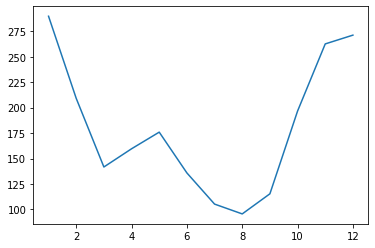

In [103]:
plt.plot(mean_aqi)